In [2]:
import pandas as pd
from pandas.api.types import is_string_dtype, is_numeric_dtype
# import pandas_profiling
import numpy as np
import re
import requests
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


import warnings
import types

%load_ext autoreload
%autoreload 2
 
%matplotlib inline

In [2]:
data = pd.read_csv('ACS_Merged_renamed.csv') 
data.head()

,Unnamed: 0,GeogName,GeoID,Population,MalePop,FemalePop,PopUnder18,PopOver65,MedianAge,PopHispanic,...,Edu9t12,EduHS,EduCollND,EduAssoc,EduBachelor,EduGradProf,EduLessHS,EduaboveBach,GardenCounts,HasGarden
0,0,Bath Beach,BK27,33163.0,16686.0,16477.0,7103.0,4888.0,38.3,5861.0,...,2326.0,6188.0,2486.0,1667.0,5345.0,2664.0,5472.0,8009.0,0,0
1,1,Bay Ridge,BK31,79134.0,37829.0,41305.0,15110.0,12380.0,39.5,14134.0,...,3900.0,11165.0,8251.0,3746.0,15823.0,11187.0,8006.0,27010.0,0,0
2,2,Bedford,BK75,75318.0,36491.0,38827.0,22379.0,5816.0,29.1,14682.0,...,5791.0,11608.0,6838.0,2215.0,9148.0,5258.0,9699.0,14406.0,23,1
3,3,Bensonhurst East,BK29,64267.0,31283.0,32984.0,12773.0,10107.0,39.6,7923.0,...,4700.0,12871.0,4433.0,3262.0,9412.0,4476.0,11556.0,13888.0,1,1
4,4,Bensonhurst West,BK28,91646.0,44651.0,46995.0,19288.0,13071.0,37.8,13378.0,...,7191.0,18127.0,6748.0,4796.0,12275.0,4784.0,18286.0,17059.0,2,1


In [3]:
pandas_profiling.ProfileReport(data)

In [4]:
#made a copy of the df to work on 
data1 = data.copy()

In [5]:
data1.head()

,Unnamed_0,GeogName,GeoID,Population,MalePop,FemalePop,PopUnder18,PopOver65,MedianAge,PopHispanic,...,Edu9t12,EduHS,EduCollND,EduAssoc,EduBachelor,EduGradProf,EduLessHS,EduaboveBach,GardenCounts,HasGarden
0,0,Bath Beach,BK27,33163.0,16686.0,16477.0,7103.0,4888.0,38.3,5861.0,...,2326.0,6188.0,2486.0,1667.0,5345.0,2664.0,5472.0,8009.0,0,0
1,1,Bay Ridge,BK31,79134.0,37829.0,41305.0,15110.0,12380.0,39.5,14134.0,...,3900.0,11165.0,8251.0,3746.0,15823.0,11187.0,8006.0,27010.0,0,0
2,2,Bedford,BK75,75318.0,36491.0,38827.0,22379.0,5816.0,29.1,14682.0,...,5791.0,11608.0,6838.0,2215.0,9148.0,5258.0,9699.0,14406.0,23,1
3,3,Bensonhurst East,BK29,64267.0,31283.0,32984.0,12773.0,10107.0,39.6,7923.0,...,4700.0,12871.0,4433.0,3262.0,9412.0,4476.0,11556.0,13888.0,1,1
4,4,Bensonhurst West,BK28,91646.0,44651.0,46995.0,19288.0,13071.0,37.8,13378.0,...,7191.0,18127.0,6748.0,4796.0,12275.0,4784.0,18286.0,17059.0,2,1


In [6]:
data1.columns

Index(['Unnamed_0', 'GeogName', 'GeoID', 'Population', 'MalePop', 'FemalePop',
       'PopUnder18', 'PopOver65', 'MedianAge', 'PopHispanic', 'PopNotHisp',
       'PopWhite', 'PopBlack', 'PopNative', 'PopAsian', 'PopPacific',
       'PopOther1', 'PopOther2', 'HHUnder10', 'HHI10t14E', 'HHI15t24E',
       'HHI25t34E', 'HHI35t49E', 'HHI50t74E', 'HHI75t99E', 'HI100t149E',
       'HI150t199E', 'HHI200plE', 'MedianHHInc', 'MeanHHInc', 'PopOver25',
       'EduBelow9', 'Edu9t12', 'EduHS', 'EduCollND', 'EduAssoc', 'EduBachelor',
       'EduGradProf', 'EduLessHS', 'EduaboveBach', 'GardenCounts',
       'HasGarden'],
      dtype='object')

In [7]:
# EduOther = combining all educational attainment that's less than a college degree (bachelors)
data1['EduOther'] = data1.EduBelow9 + data1.Edu9t12 + data1.EduHS + data1.EduCollND

In [8]:
data1.head()

,Unnamed_0,GeogName,GeoID,Population,MalePop,FemalePop,PopUnder18,PopOver65,MedianAge,PopHispanic,...,EduHS,EduCollND,EduAssoc,EduBachelor,EduGradProf,EduLessHS,EduaboveBach,GardenCounts,HasGarden,EduOther
0,0,Bath Beach,BK27,33163.0,16686.0,16477.0,7103.0,4888.0,38.3,5861.0,...,6188.0,2486.0,1667.0,5345.0,2664.0,5472.0,8009.0,0,0,14146.0
1,1,Bay Ridge,BK31,79134.0,37829.0,41305.0,15110.0,12380.0,39.5,14134.0,...,11165.0,8251.0,3746.0,15823.0,11187.0,8006.0,27010.0,0,0,27422.0
2,2,Bedford,BK75,75318.0,36491.0,38827.0,22379.0,5816.0,29.1,14682.0,...,11608.0,6838.0,2215.0,9148.0,5258.0,9699.0,14406.0,23,1,28145.0
3,3,Bensonhurst East,BK29,64267.0,31283.0,32984.0,12773.0,10107.0,39.6,7923.0,...,12871.0,4433.0,3262.0,9412.0,4476.0,11556.0,13888.0,1,1,28860.0
4,4,Bensonhurst West,BK28,91646.0,44651.0,46995.0,19288.0,13071.0,37.8,13378.0,...,18127.0,6748.0,4796.0,12275.0,4784.0,18286.0,17059.0,2,1,43161.0


In [23]:
# Compiled income categories into 4 groups
data1['Income0_49'] = data1.HHUnder10 + data1.HHI10t14E + data1.HHI15t24E + data1.HHI25t34E + data1.HHI35t49E
data1['Income_50_99'] = data1.HHI50t74E + data1.HHI75t99E 
data1['Income_100_199'] = data1.HI100t149E + data1.HI150t199E
data1['Income_200up'] = data1.HHI200plE


In [24]:
data1.head()

,Unnamed_0,GeogName,GeoID,Population,MalePop,FemalePop,PopUnder18,PopOver65,MedianAge,PopHispanic,...,EduLessHS,EduaboveBach,GardenCounts,HasGarden,EduOther,Income0_49,Income_50_99,Income_100_199,Income_200up,PopOTHER
0,0,Bath Beach,BK27,33163.0,16686.0,16477.0,7103.0,4888.0,38.3,5861.0,...,5472.0,8009.0,0,0,14146.0,4953.0,3426.0,2464.0,585.0,433.0
1,1,Bay Ridge,BK31,79134.0,37829.0,41305.0,15110.0,12380.0,39.5,14134.0,...,8006.0,27010.0,0,0,27422.0,13710.0,9678.0,7324.0,2775.0,1777.0
2,2,Bedford,BK75,75318.0,36491.0,38827.0,22379.0,5816.0,29.1,14682.0,...,9699.0,14406.0,23,1,28145.0,15008.0,5975.0,4042.0,1034.0,1373.0
3,3,Bensonhurst East,BK29,64267.0,31283.0,32984.0,12773.0,10107.0,39.6,7923.0,...,11556.0,13888.0,1,1,28860.0,11327.0,6456.0,3560.0,844.0,1061.0
4,4,Bensonhurst West,BK28,91646.0,44651.0,46995.0,19288.0,13071.0,37.8,13378.0,...,18286.0,17059.0,2,1,43161.0,14741.0,8545.0,5392.0,1231.0,1223.0


In [25]:
data1.columns

Index(['Unnamed_0', 'GeogName', 'GeoID', 'Population', 'MalePop', 'FemalePop',
       'PopUnder18', 'PopOver65', 'MedianAge', 'PopHispanic', 'PopNotHisp',
       'PopWhite', 'PopBlack', 'PopNative', 'PopAsian', 'PopPacific',
       'PopOther1', 'PopOther2', 'HHUnder10', 'HHI10t14E', 'HHI15t24E',
       'HHI25t34E', 'HHI35t49E', 'HHI50t74E', 'HHI75t99E', 'HI100t149E',
       'HI150t199E', 'HHI200plE', 'MedianHHInc', 'MeanHHInc', 'PopOver25',
       'EduBelow9', 'Edu9t12', 'EduHS', 'EduCollND', 'EduAssoc', 'EduBachelor',
       'EduGradProf', 'EduLessHS', 'EduaboveBach', 'GardenCounts', 'HasGarden',
       'EduOther', 'Income0_49', 'Income_50_99', 'Income_100_199',
       'Income_200up', 'PopOTHER'],
      dtype='object')

In [26]:
#Combine some race categories into 'PopOTHER'

data1['PopOTHER'] = data1.PopNative + data1.PopPacific + data1.PopOther1 + data1.PopOther2

In [27]:
data1.columns

Index(['Unnamed_0', 'GeogName', 'GeoID', 'Population', 'MalePop', 'FemalePop',
       'PopUnder18', 'PopOver65', 'MedianAge', 'PopHispanic', 'PopNotHisp',
       'PopWhite', 'PopBlack', 'PopNative', 'PopAsian', 'PopPacific',
       'PopOther1', 'PopOther2', 'HHUnder10', 'HHI10t14E', 'HHI15t24E',
       'HHI25t34E', 'HHI35t49E', 'HHI50t74E', 'HHI75t99E', 'HI100t149E',
       'HI150t199E', 'HHI200plE', 'MedianHHInc', 'MeanHHInc', 'PopOver25',
       'EduBelow9', 'Edu9t12', 'EduHS', 'EduCollND', 'EduAssoc', 'EduBachelor',
       'EduGradProf', 'EduLessHS', 'EduaboveBach', 'GardenCounts', 'HasGarden',
       'EduOther', 'Income0_49', 'Income_50_99', 'Income_100_199',
       'Income_200up', 'PopOTHER'],
      dtype='object')

In [91]:
#acsg = created this df w/ just the columns I need to perform PCA
acsg = data1[['GeogName', 'Population', 
       'PopUnder18', 'PopOver65', 'MedianAge', 'PopHispanic', 'PopNotHisp',
       'PopWhite', 'PopBlack','PopAsian','PopOTHER','Income0_49', 'Income_50_99', 
        'Income_100_199','Income_200up', 'EduOther','GardenCounts']].copy()


In [92]:
acsg.head()

,GeogName,Population,PopUnder18,PopOver65,MedianAge,PopHispanic,PopNotHisp,PopWhite,PopBlack,PopAsian,PopOTHER,Income0_49,Income_50_99,Income_100_199,Income_200up,EduOther,GardenCounts
0,Bath Beach,33163.0,7103.0,4888.0,38.3,5861.0,27302.0,14490.0,404.0,11975.0,433.0,4953.0,3426.0,2464.0,585.0,14146.0,0
1,Bay Ridge,79134.0,15110.0,12380.0,39.5,14134.0,65000.0,50197.0,1511.0,11515.0,1777.0,13710.0,9678.0,7324.0,2775.0,27422.0,0
2,Bedford,75318.0,22379.0,5816.0,29.1,14682.0,60636.0,26407.0,30566.0,2290.0,1373.0,15008.0,5975.0,4042.0,1034.0,28145.0,23
3,Bensonhurst East,64267.0,12773.0,10107.0,39.6,7923.0,56344.0,29894.0,531.0,24858.0,1061.0,11327.0,6456.0,3560.0,844.0,28860.0,1
4,Bensonhurst West,91646.0,19288.0,13071.0,37.8,13378.0,78268.0,39112.0,801.0,37132.0,1223.0,14741.0,8545.0,5392.0,1231.0,43161.0,2


In [93]:
pandas_profiling.ProfileReport(acsg)

In [94]:
acsg.shape

(195, 17)

In [95]:
acsg = acsg.set_index('GeogName') 

In [96]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from matplotlib.pylab import plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [97]:
from sklearn.preprocessing import StandardScaler 

In [98]:
scaler = StandardScaler()

In [99]:
scaler.fit(acsg)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [100]:
acsg = acsg.replace([np.inf, -np.inf, np.nan], 0)


In [105]:
from sklearn.decomposition import PCA
pca = PCA(n_components=16)
principalComponents = pca.fit_transform(acsg)


([<matplotlib.axis.XTick at 0x1a2dcaae10>,
 <a list of 16 Text xticklabel objects>)

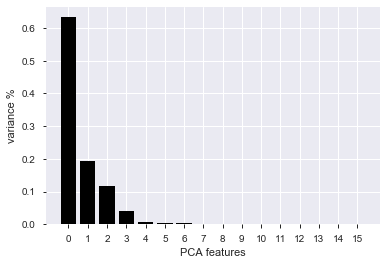

In [106]:
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
# looks like first two components explains 80% of variance



In [108]:
acsg_garden_cts = acsg['GardenCounts']

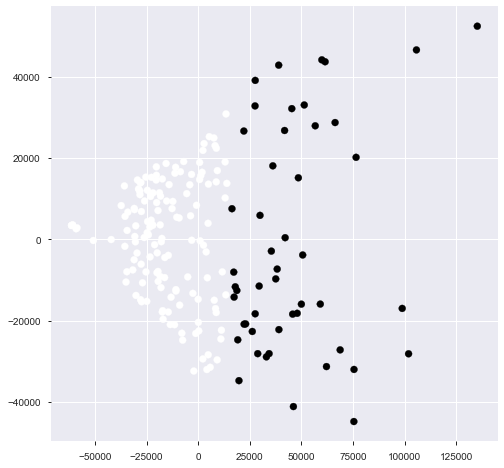

In [117]:
fig = plt.figure(figsize=(8,8))

# plot pca components according to predicted clusters
plt.scatter(x=principalComponents[:,0], y=principalComponents[:,1], c=rr.labels_) 

In [111]:
km1 = KMeans(random_state=1, n_clusters=2, n_init=20)

In [112]:
# train the model
model = km1.fit(acsg)

In [113]:
y_t1 = model.labels_

In [114]:
print(y_t1)

[1 0 0 0 0 0 1 1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1
 0 1 1 0 0 1 0 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1
 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 0 0 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1]


In [115]:
# Silhouette_score

X1 = acsg
range_n_clusters = [2, 3, 4, 5, 6, 7, 8] # or use range(2, 9)
for n_clusters in range_n_clusters:
    km1 = KMeans(n_clusters=n_clusters, random_state=324)
    cluster_labels = km1.fit_predict(X1)
    silhouette_avg = silhouette_score(X1, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(X1, cluster_labels)

For n_clusters = 2 The average silhouette_score is : 0.45413445709836653
For n_clusters = 3 The average silhouette_score is : 0.36715423297756267
For n_clusters = 4 The average silhouette_score is : 0.39928655881517167
For n_clusters = 5 The average silhouette_score is : 0.3465603112919532
For n_clusters = 6 The average silhouette_score is : 0.3071568071671161
For n_clusters = 7 The average silhouette_score is : 0.3366074776191025
For n_clusters = 8 The average silhouette_score is : 0.3532482039084697


In [120]:
acsg.to_csv(r'Documents\ACSG_merged_filtered.csv')

# Visualize the neighborhood clusters

In [6]:
acsg = pd.read_csv('../data/ACS_merged_filtered.csv', index_col=0)
acsg.head()

,Population,PopUnder18,PopOver65,MedianAge,PopHispanic,PopNotHisp,PopWhite,PopBlack,PopAsian,PopOTHER,Income0_49,Income_50_99,Income_100_199,Income_200up,EduOther,GardenCounts
GeogName,,,,,,,,,,,,,,,,
Bath Beach,33163.0,7103.0,4888.0,38.3,5861.0,27302.0,14490.0,404.0,11975.0,433.0,4953.0,3426.0,2464.0,585.0,14146.0,0
Bay Ridge,79134.0,15110.0,12380.0,39.5,14134.0,65000.0,50197.0,1511.0,11515.0,1777.0,13710.0,9678.0,7324.0,2775.0,27422.0,0
Bedford,75318.0,22379.0,5816.0,29.1,14682.0,60636.0,26407.0,30566.0,2290.0,1373.0,15008.0,5975.0,4042.0,1034.0,28145.0,23
Bensonhurst East,64267.0,12773.0,10107.0,39.6,7923.0,56344.0,29894.0,531.0,24858.0,1061.0,11327.0,6456.0,3560.0,844.0,28860.0,1
Bensonhurst West,91646.0,19288.0,13071.0,37.8,13378.0,78268.0,39112.0,801.0,37132.0,1223.0,14741.0,8545.0,5392.0,1231.0,43161.0,2


In [10]:
acsg.shape

(195, 16)

In [33]:
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler()
acsg_scaled = scaler.fit_transform(acsg)

/usr/local/Cellar/python3/3.6.2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/Cellar/python3/3.6.2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [34]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

scores = []
n_candidates = range(2, 9)
for n_clusters in n_candidates:
    km1 = KMeans(n_clusters=n_clusters, random_state=324)
    cluster_labels = km1.fit_predict(acsg_scaled)
    silhouette_avg = silhouette_score(acsg_scaled, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    scores.append(silhouette_avg)

print(f"\n==> highest score={np.max(scores)} with n={n_candidates[np.argmax(scores)]}")

For n_clusters = 2 The average silhouette_score is : 0.39871625263598537
For n_clusters = 3 The average silhouette_score is : 0.36126089628549407
For n_clusters = 4 The average silhouette_score is : 0.2661374380080858
For n_clusters = 5 The average silhouette_score is : 0.2933442889333339
For n_clusters = 6 The average silhouette_score is : 0.21659333167393122
For n_clusters = 7 The average silhouette_score is : 0.22806544063276696
For n_clusters = 8 The average silhouette_score is : 0.22146099570500855

==> highest score=0.39871625263598537 with n=2


In [47]:
# optimal_n = n_candidates[np.argmax(scores)]
optimal_n = 3
km = KMeans(n_clusters=optimal_n, random_state=324)
cluster_labels = km.fit_predict(acsg_scaled)

In [48]:
acsg_scaled = pd.DataFrame(acsg_scaled, index=acsg.index, columns=acsg.columns)
acsg_scaled['Cluster'] = cluster_labels
acsg_scaled.head(2)

,Population,PopUnder18,PopOver65,MedianAge,PopHispanic,PopNotHisp,PopWhite,PopBlack,PopAsian,PopOTHER,Income0_49,Income_50_99,Income_100_199,Income_200up,EduOther,GardenCounts,Cluster
GeogName,,,,,,,,,,,,,,,,,
Bath Beach,-0.444601,-0.371159,-0.219950,0.297958,-0.553867,-0.178157,0.032827,-0.659079,0.782970,-0.453465,-0.521068,-0.318752,-0.259301,-0.309862,-0.298447,-0.501624,0
Bay Ridge,1.552994,1.046523,1.978409,0.489292,0.125588,1.747442,2.424311,-0.580064,0.723683,0.290561,1.340802,2.199607,1.770601,0.593269,0.993728,-0.501624,1


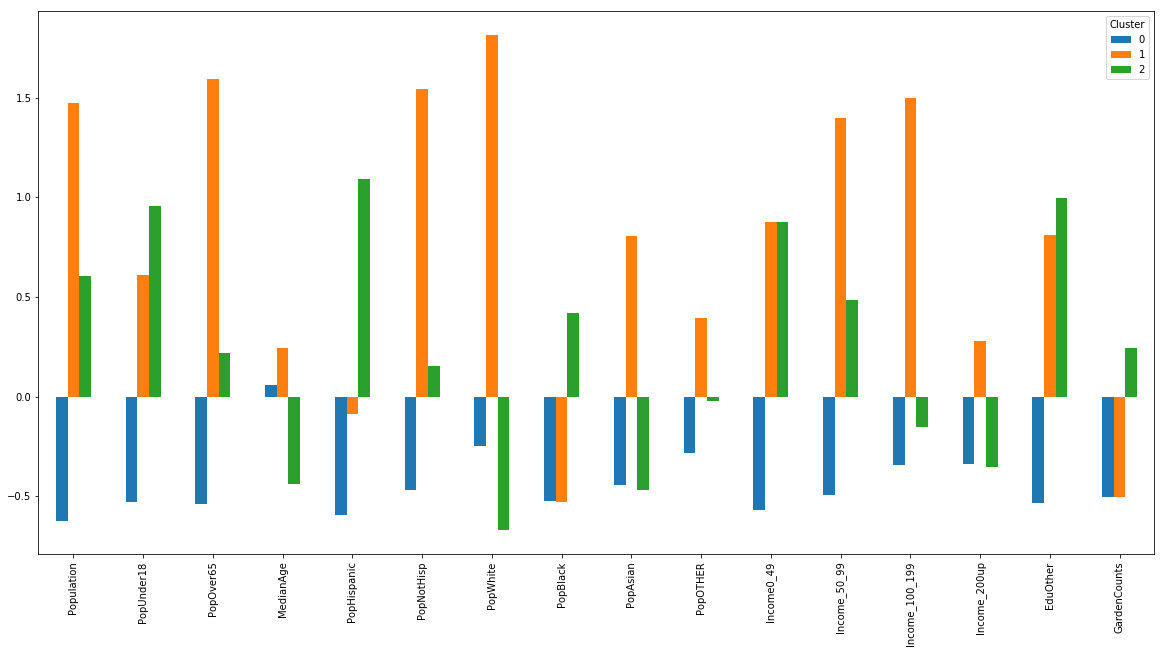

In [57]:
# visualize characteristics of diff clusters
acsg_scaled.groupby('Cluster').median().T.plot.bar(figsize=(20,10))

In [63]:
to_viz = acsg_scaled.groupby('Cluster').median()
to_viz

,Population,PopUnder18,PopOver65,MedianAge,PopHispanic,PopNotHisp,PopWhite,PopBlack,PopAsian,PopOTHER,Income0_49,Income_50_99,Income_100_199,Income_200up,EduOther,GardenCounts
Cluster,,,,,,,,,,,,,,,,
0,-0.623933,-0.528561,-0.538026,0.058790,-0.594972,-0.466476,-0.247431,-0.525390,-0.444985,-0.283512,-0.569970,-0.492966,-0.344090,-0.337699,-0.530923,-0.501624
1,1.470194,0.609374,1.592845,0.242152,-0.084416,1.544375,1.811488,-0.528851,0.807200,0.395190,0.873368,1.395601,1.499947,0.277791,0.811036,-0.501624
2,0.607579,0.955340,0.221071,-0.435490,1.089703,0.154831,-0.666528,0.420142,-0.468765,-0.021110,0.877089,0.486462,-0.151541,-0.350277,0.994312,0.245068
